# Course Description 

Sampling in Python is the cornerstone of inference statistics and hypothesis testing. It's a powerful skill used in survey analysis and experimental design to draw conclusions without surveying an entire population. In this Sampling in Python course, you’ll discover when to use sampling and how to perform common types of sampling—from simple random sampling to more complex methods like stratified and cluster sampling. Using real-world datasets, including coffee ratings, Spotify songs, and employee attrition, you’ll learn to estimate population statistics and quantify uncertainty in your estimates by generating sampling distributions and bootstrap distributions. 

**Part of the Data Scientist with Python track**

<span style='color:red'>When to use .sample, when to use random.sample, when can use both n and frac, when can only use n.</span>

#### Datasets used for this course is in `.feather` format, so make sure to install relevant packages. 

In [1]:
# !pip install feather-format

In [2]:
# !pip install pyarrow

---
# Table of contents 

- ## 1. Introduction to Sampling
    
    - ### Sampling and point estimates
    
    - ### Convenience sampling
    
    - ### Pseudo-random number generation
    

- ## 2. Sampling Methods

    - ### Simple random and systematic sampling
    
    - ### Stratified and weighted random sampling 
    
    - ### Cluster sampling
    
    - ### Comparing sampling methods

- ## 3. Sampling Distributions 

    - ### Relative error of point estimates 
    
    - ### Creating a sampling distribution 
    
    - ### Approximate sampling distributions 
    
    - ### Standard errors and the Central Limit Theorem 

- ## 4. Bootstrap Distributions 

    - ### Introduction to bootstrapping 
    
    - ### Comparing sampling and bootstrap distributions 
    
    - ### Confidence intervals 

### Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

### Datasets

- **Coffee ratings** (coffee_ratings_full.feather) 

- **Spotify song attributes** (spotify_2000_2020.feather)

- **Employee attrition** (attrition.feather)

In [4]:
path = '/Users/wenwen/Courses/ONLINE/DataCamp/data/'
file_coffee = 'coffee_ratings_full.feather'
file_spotify= 'spotify_2000_2020.feather'
file_attrition = 'attrition.feather'

coffee_ratings = pd.read_feather(path + file_coffee)
spotify_population= pd.read_feather(path + file_spotify)
attrition_pop = pd.read_feather(path + file_attrition)

---
# 1. Introduction to Sampling 

Learn what sampling is and why it is so powerful. You’ll also learn about the problems caused by convenience sampling and the differences between true randomness and pseudo-randomness. 

## Sampling and point estimates

#### Example: estimating the population of France 

- In 1786, Pierre-Simon Laplace realized you could estimate the population with less effort. 

- Cheaper to ask a small number of households and use statistics to estimate the population.

- Working with a subset of the whole population is called **sampling**.

#### Population vs. sample 

- The **population** is the complete dataset

- The **sample** is the subset of data you calculate on

#### Coffee rating dataset 

In [5]:
coffee_ratings.head()

total_cup_points  species                     owner country_of_origin  \
0             90.58  Arabica                 metad plc          Ethiopia   
1             89.92  Arabica                 metad plc          Ethiopia   
2             89.75  Arabica  grounds for health admin         Guatemala   
3             89.00  Arabica       yidnekachew dabessa          Ethiopia   
4             88.83  Arabica                 metad plc          Ethiopia   

                                  farm_name lot_number       mill ico_number  \
0                                 metad plc       None  metad plc  2014/2015   
1                                 metad plc       None  metad plc  2014/2015   
2  san marcos barrancas "san cristobal cuch       None       None       None   
3     yidnekachew dabessa coffee plantation       None    wolensu       None   
4                                 metad plc       None  metad plc  2014/2015   

                                 company       altitude  ...  color  \
0      metad agricultural developmet plc      1950-2200  ...  Green   
1      metad agricultural developmet plc      1950-2200  ...  Green   
2                                   None  1600 - 1800 m  ...   None   
3  yidnekachew debessa coffee plantation      1800-2200  ...  Green   
4      metad agricultural developmet plc      1950-2200  ...  Green   

  category_two_defects        expiration                  certification_body  \
0                  0.0   April 3rd, 2016  METAD Agricultural Development plc   
1                  1.0   April 3rd, 2016  METAD Agricultural Development plc   
2                  0.0    May 31st, 2011        Specialty Coffee Association   
3                  2.0  March 25th, 2016  METAD Agricultural Development plc   
4                  2.0   April 3rd, 2016  METAD Agricultural Development plc   

                      certification_address  \
0  309fcf77415a3661ae83e027f7e5f05dad786e44   
1  309fcf77415a3661ae83e027f7e5f05dad786e44   
2  36d0d00a3724338ba7937c52a378d085f2172daa   
3  309fcf77415a3661ae83e027f7e5f05dad786e44   
4  309fcf77415a3661ae83e027f7e5f05dad786e44   

                      certification_contact unit_of_measurement  \
0  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
1  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
2  0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660                   m   
3  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
4  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   

  altitude_low_meters altitude_high_meters altitude_mean_meters  
0              1950.0               2200.0               2075.0  
1              1950.0               2200.0               2075.0  
2              1600.0               1800.0               1700.0  
3              1800.0               2200.0               2000.0  
4              1950.0               2200.0               2075.0  

[5 rows x 43 columns]

It doesn't contain every coffee in the world, so we don't know exactly what the population of coffees is. However, there are enough here that we can think of it as our population of interest. 

In [6]:
coffee_ratings.columns

Index(['total_cup_points', 'species', 'owner', 'country_of_origin',
       'farm_name', 'lot_number', 'mill', 'ico_number', 'company', 'altitude',
       'region', 'producer', 'number_of_bags', 'bag_weight',
       'in_country_partner', 'harvest_year', 'grading_date', 'owner_1',
       'variety', 'processing_method', 'aroma', 'flavor', 'aftertaste',
       'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness',
       'cupper_points', 'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

Let's consider the relationship between cup points and flavor by selecting those two columns. 

In [7]:
pts_vs_flavor_pop = coffee_ratings[['total_cup_points', 'flavor']]
pts_vs_flavor_pop

total_cup_points  flavor
0                90.58    8.83
1                89.92    8.67
2                89.75    8.50
3                89.00    8.58
4                88.83    8.50
...                ...     ...
1333             78.75    7.58
1334             78.08    7.67
1335             77.17    7.33
1336             75.08    6.83
1337             73.75    6.67

[1338 rows x 2 columns]

#### Use `.sample()` for `pandas` DataFrames and Series

- Return ramdom samples 

- By default, rows from the original dataset can't appear in the sample dataset multiple times, so we are guaranteed to have unique rows in our sample.

In [8]:
pts_vs_flavor_samp = pts_vs_flavor_pop.sample(n=10)
pts_vs_flavor_samp

total_cup_points  flavor
207              84.25    7.83
1024             80.92    7.42
911              81.50    7.42
1259             77.00    7.75
331              83.67    7.50
411              83.33    7.50
1281             74.92    6.75
1075             80.50    7.42
666              82.50    7.58
54               85.92    8.00

Use `.sample()` for `pandas` series

In [9]:
cup_points_samp = coffee_ratings['total_cup_points'].sample(n=10)
cup_points_samp

635     82.58
1132    79.92
310     83.75
406     83.33
45      86.08
775     82.17
1146    79.75
1226    78.33
815     81.92
797     82.00
Name: total_cup_points, dtype: float64

#### Population parameters & point estimates 

- A **population parameter** is a calculation made on the population dataset.

- A **point estimate**, or **sample statistic**, is a calculation based on the sample dataset.

In [10]:
np.mean(pts_vs_flavor_pop['total_cup_points'])

82.15120328849028

In [11]:
np.mean(cup_points_samp)

81.98299999999999

#### Point estimates with pandas

In [12]:
pts_vs_flavor_pop['flavor'].mean()

7.526046337817639

In [13]:
pts_vs_flavor_samp['flavor'].mean()

7.517

### Exercise: Simple sampling with pandas

Throughout this chapter, you'll be exploring song data from Spotify. Each row of this population dataset represents a song, and there are over 40,000 rows. Columns include the song name, the artists who performed it, the release year, and attributes of the song like its duration, tempo, and danceability. You'll start by looking at the durations.

Your first task is to sample the Spotify dataset and compare the mean duration of the population with the sample.

In [14]:
spotify_population.head()

acousticness          artists  danceability  duration_ms  duration_minutes  \
0       0.97200  ['David Bauer']         0.567     313293.0          5.221550   
1       0.32100   ['Etta James']         0.821     360240.0          6.004000   
2       0.00659    ['Quasimoto']         0.706     202507.0          3.375117   
3       0.00390  ['Millencolin']         0.368     173360.0          2.889333   
4       0.12200   ['Steve Chou']         0.501     344200.0          5.736667   

   energy  explicit                      id  instrumentalness   key  liveness  \
0   0.227       0.0  0w0D8H1ubRerCXHWYJkinO          0.601000  10.0     0.110   
1   0.418       0.0  4JVeqfE2tpi7Pv63LJZtPh          0.000372   9.0     0.222   
2   0.602       1.0  5pxtdhLAi0RTh1gNqhGMNA          0.000138  11.0     0.400   
3   0.977       0.0  3jRsoe4Vkxa4BMYqGHX8L0          0.000000  11.0     0.350   
4   0.511       0.0  4mronxcllhfyhBRqyZi8kU          0.000000   7.0     0.279   

   loudness  mode                   name  popularity release_date  \
0   -13.441   1.0      Shout to the Lord        47.0         2000   
1    -9.841   0.0               Miss You        51.0   2000-12-12   
2    -8.306   0.0              Real Eyes        44.0   2000-06-13   
3    -2.757   0.0  Penguins & Polarbears        52.0   2000-02-22   
4    -9.836   0.0                     黃昏        53.0   2000-12-25   

   speechiness    tempo  valence    year  
0       0.0290  136.123   0.0396  2000.0  
1       0.0407  117.382   0.8030  2000.0  
2       0.3420   89.692   0.4790  2000.0  
3       0.1270  165.889   0.5480  2000.0  
4       0.0291   78.045   0.1130  2000.0

In [15]:
# Sample 1000 rows from spotify_population, assigning to spotify_sample
spotify_sample = spotify_population.sample(n=1000)

# Calculate the mean duration in minutes from spotify_population
mean_dur_pop = spotify_population['duration_minutes'].mean()

# Calculate the mean duration in minutes from spotify_sample
mean_dur_samp = spotify_sample['duration_minutes'].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

3.8521519140900073
3.8107626


### Exercise: Simple sampling and calculating with NumPy

You can also use `numpy` to calculate parameters or statistics from a list or `pandas` Series.

You'll be turning it up to eleven and looking at the `loudness` property of each song.


In [16]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

# Print the means
print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-7.79735


---
## Convenience sampling

In 1936, a newspaper called The Literary Digest ran an extensive poll to try to predict the next US presidential election. They phoned ten million voters and had over two million responses. About 1.3 million people said they would vote for Landon, and just under 1 million people said they would vote for Roosevelt. 

Since the sample size was so large, it was presumed that this poll would be very accurate. However, in the election, Roosevelt won by a landslide with 62% percent of the vote. 

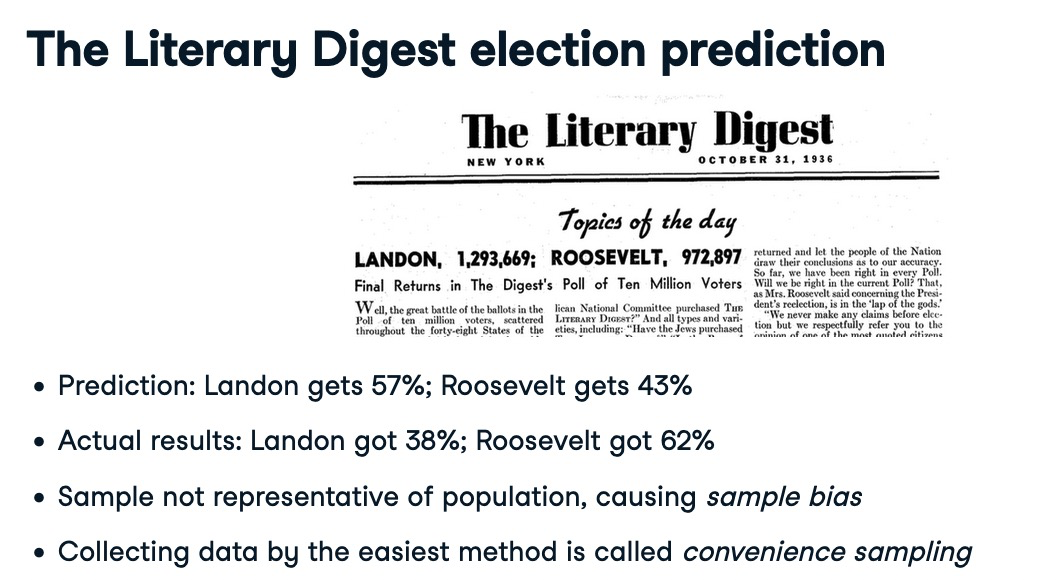

#### What went wrong?

In 1936, telephones were a luxury, so the only people who had been contacted by The Literary Digest were relatively rich. The sample of voters was not representative of the whole population of voters, and so the poll suffered from **sample bias**. 

#### Collecting data by the easiest method is called convenience sampling, and is often prone to sample bias. 

#### Before sampling, we need to think about our data collection process to avoid biased results. 

---
#### Convenience sampling coffee ratings 

Population mean of total_cup_points

In [17]:
coffee_ratings['total_cup_points'].mean()

82.15120328849028

One way for convenience sampling is to take the first 10 rows, instead of random rows

In [18]:
coffee_ratings_first10 = coffee_ratings.head(10)
coffee_ratings_first10['total_cup_points'].mean()

89.1

The discrepancy suggests that coffees with higher cup points appear near the start of the dataset. 

#### Histograms to visualize selection bias

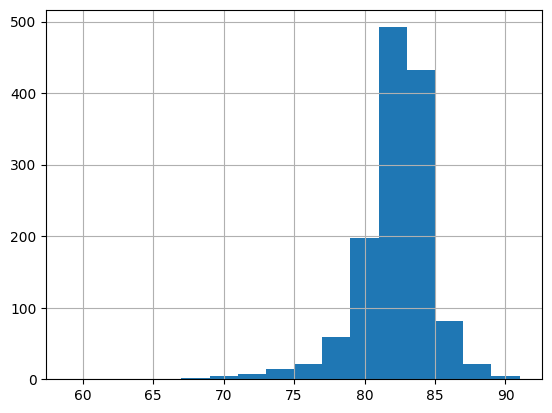

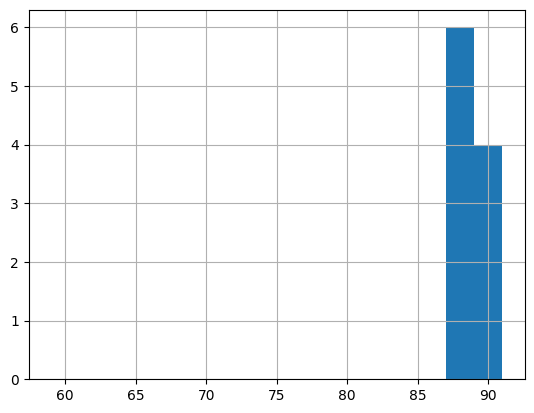

In [19]:
coffee_ratings['total_cup_points'].hist(bins=np.arange(59, 93, 2))
plt.show()
coffee_ratings_first10['total_cup_points'].hist(bins=np.arange(59,93,2))
plt.show()

It is clear that the distribution of the sample is not the same as the population. 

#### Visualizing selection bias for a random sample

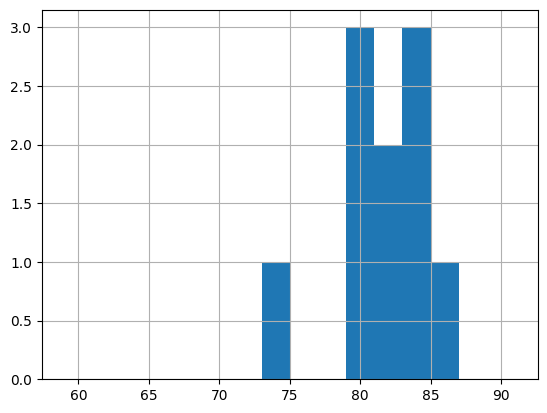

In [20]:
coffee_sample = coffee_ratings.sample(n=10)
coffee_sample['total_cup_points'].hist(bins=np.arange(59, 93, 2))
plt.show()

### Exercise: Are findings from the sample generalizable?

You just saw how convenience sampling—collecting data using the easiest method—can result in samples that aren't representative of the population. Equivalently, this means findings from the sample are not generalizable to the population. Visualizing the distributions of the population and the sample can help determine whether or not the sample is representative of the population.

The Spotify dataset contains an `acousticness` column, which is a confidence measure from zero to one of whether the track was made with instruments that aren't plugged in. You'll compare the `acousticness` distribution of the total population of songs with a sample of those songs.

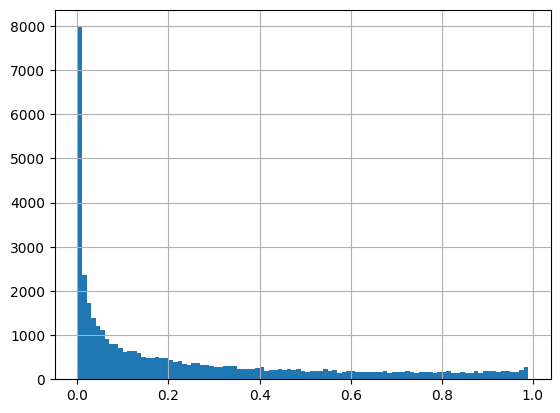

In [21]:
# Visualize the distribution of acousticness with a histogram
spotify_population['acousticness'].hist(bins=np.arange(0, 1, 0.01))
plt.show()

---
## Pseudo-random number generation

- Pseudo-random number generation is cheap and fast 

- Pseudo-random means that although each value appears to be random, it is actually calculated from the previous random number. 

- Since you have to start the calculation somewhere, the first random number is calculated from what is known as a **seed** value. 

- Therefore, this process isn't really random: the same seed value yields the same random numbers. 

#### NumPy has many functions for generating random numbers from statistical distributions. 

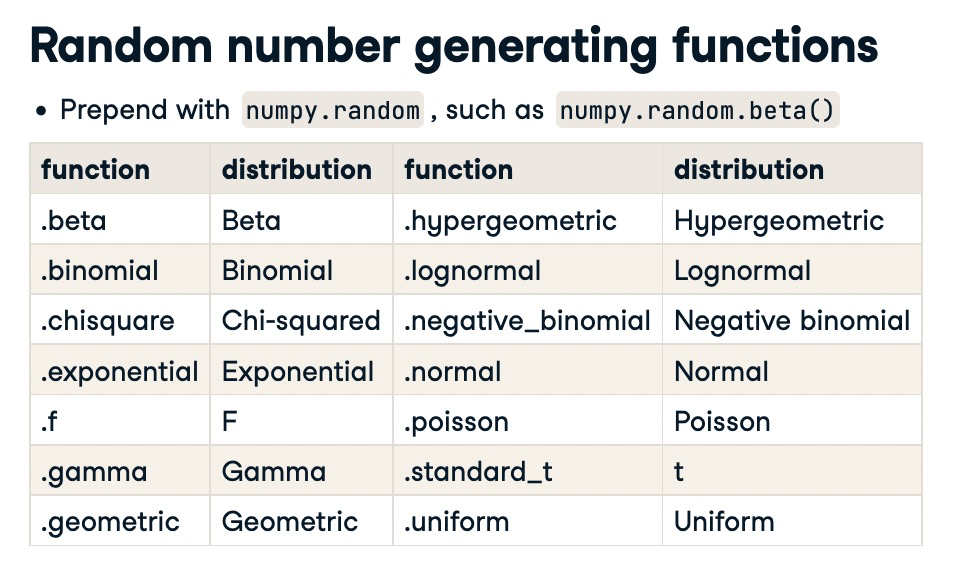

#### Visualize random numbers 

- The first arguments to each random number function specify distribution parameters.

- The size argument specifies how many numbers to generate. 

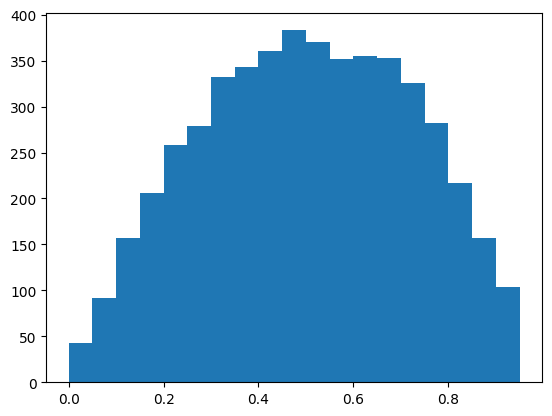

In [22]:
randoms = np.random.beta(a=2, b=2, size=5000)
plt.hist(randoms, bins=np.arange(0, 1, 0.05))
plt.show()

Here because the numbers were generated from the beta distribution, all the values are between 0 and 1. 

#### Random numbers seed with `numpy.random.seed()`

In [23]:
np.random.seed(20000229)

`np.random.normal()` generate random numbers from a normal distribution, the `loc` and `scale` arguments set the mean and standard deviation of the distribution, and the `size` argument determines how many random numbers from that distribution will be returned. 

In [24]:
np.random.normal(loc=2, scale=1.5, size=2)

array([-0.59030264,  1.87821258])

#### If we call `.normal` a second time, we get two different random numbers. 

In [25]:
np.random.normal(loc=2, scale=1.5, size=2)

array([2.52619561, 4.9684949 ])

#### If we reset the random seed value using the same seed, and then call dot-normal again, we get the same numbers as before. 

In [26]:
np.random.seed(20000229)

In [27]:
np.random.normal(loc=2, scale=1.5, size=2)

array([-0.59030264,  1.87821258])

In [28]:
np.random.normal(loc=2, scale=1.5, size=2)

array([2.52619561, 4.9684949 ])

---
# 2. Sampling Methods

It’s time to get hands-on and perform the four random sampling methods in Python: simple, systematic, stratified, and cluster. 

---
## Simple random and systematic sampling

**Simple random sampling** works like a raffle or lottery. 

#### Simple random sampling with `pandas`

In [29]:
coffee_ratings.sample(n=5, random_state=19000113)

total_cup_points  species                           owner  \
437             83.25  Arabica  exportadora de cafe condor s.a   
285             83.83  Arabica                 ipanema coffees   
784             82.08  Arabica                   cafe politico   
648             82.58  Arabica  exportadora de cafe condor s.a   
155             84.58  Arabica  exportadora de cafe condor s.a   

    country_of_origin          farm_name lot_number  \
437          Colombia               None       None   
285            Brazil  fazenda rio verde       None   
784          Colombia               None       None   
648          Colombia               None       None   
155          Colombia            various       None   

                                      mill     ico_number  \
437  trilladora bonanza - armenia quindioa      3-68-0205   
285                        ipanema coffees  002/4177/0121   
784                                   None      3-59-1656   
648                    trilladora boananza      3-68-0140   
155                    trilladora boananza      3-68-0005   

                            company       altitude  ...  color  \
437                            None  1600-1800msnm  ...   None   
285                 ipanema coffees           1260  ...  Green   
784                   cafe politico           None  ...  Green   
648  exportadora de cafe condor s.a      1750 msnm  ...  Green   
155  exportadora de cafe condor s.a      1800 msnm  ...  Green   

    category_two_defects            expiration            certification_body  \
437                  0.0       June 13th, 2012                      Almacafé   
285                  0.0   December 26th, 2014  Specialty Coffee Association   
784                  0.0  September 12th, 2015  Specialty Coffee Association   
648                  0.0   February 27th, 2014                      Almacafé   
155                  6.0     October 9th, 2013                      Almacafé   

                        certification_address  \
437  e493c36c2d076bf273064f7ac23ad562af257a25   
285  36d0d00a3724338ba7937c52a378d085f2172daa   
784  36d0d00a3724338ba7937c52a378d085f2172daa   
648  e493c36c2d076bf273064f7ac23ad562af257a25   
155  e493c36c2d076bf273064f7ac23ad562af257a25   

                        certification_contact unit_of_measurement  \
437  70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab                   m   
285  0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660                   m   
784  0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660                   m   
648  70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab                   m   
155  70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab                   m   

    altitude_low_meters altitude_high_meters altitude_mean_meters  
437              1600.0               1800.0               1700.0  
285              1260.0               1260.0               1260.0  
784                 NaN                  NaN                  NaN  
648              1750.0               1750.0               1750.0  
155              1800.0               1800.0               1800.0  

[5 rows x 43 columns]

**Systematic sampling** samples the population at regular intervals.

Systematic sampling is a bit trickier than simple random sampling. The tricky part is determining hwo big the interval between each row should be for a given sample size. 

Suppose we set sample size to 5, the population size is the number of rows in the whole dataset. The interval is the population size divided by the sample size. Because we want the answer to be an integer, we perform **integer division** with two forward slashes. 

In [30]:
sample_size = 5
pop_size = len(coffee_ratings)
interval = pop_size // sample_size 
print(interval)

267


We call `.iloc` to select every 267 row. Double-colon interval tells pandas to select every 267 row from zero to the end of the DataFrame.

In [31]:
coffee_ratings.iloc[::interval]

total_cup_points  species                             owner  \
0                90.58  Arabica                         metad plc   
267              83.92  Arabica  federacion nacional de cafeteros   
534              82.92  Arabica      consejo salvadoreño del café   
801              82.00  Arabica            lin, che-hao krude 林哲豪   
1068             80.50  Arabica          cqi taiwan icp cqi台灣合作夥伴   
1335             77.17  Robusta                       james moore   

     country_of_origin                                     farm_name  \
0             Ethiopia                                     metad plc   
267           Colombia                                          None   
534        El Salvador                                santa josefita   
801             Taiwan  you siang coffee farmtainan, taiwan 台灣台南優香咖啡   
1068            Taiwan                                           王秋金   
1335     United States                               fazenda cazengo   

     lot_number                                          mill  ico_number  \
0          None                                     metad plc   2014/2015   
267        None                                          None     01-1969   
534       1-198                          beneficio cuzcachapa  09-030-273   
801        None  you siang coffee farmtainan, taiwan 台灣台南優香咖啡      Taiwan   
1068          1                                           non        None   
1335       None                                  cafe cazengo        None   

                                company    altitude  ...       color  \
0     metad agricultural developmet plc   1950-2200  ...       Green   
267    federacion nacional de cafeteros        None  ...        None   
534       soc. coop. cuzcachapa de r.l.        1350  ...       Green   
801               red on tree co., ltd.        600m  ...       Green   
1068                                王秋金          50  ...  Blue-Green   
1335            global opportunity fund  795 meters  ...        None   

     category_two_defects           expiration  \
0                     0.0      April 3rd, 2016   
267                   1.0     March 11th, 2016   
534                   1.0    August 28th, 2018   
801                   0.0      July 22nd, 2015   
1068                  0.0   December 8th, 2018   
1335                  6.0  December 23rd, 2015   

                      certification_body  \
0     METAD Agricultural Development plc   
267                             Almacafé   
534            Salvadoran Coffee Council   
801         Specialty Coffee Association   
1068        Blossom Valley International   
1335        Specialty Coffee Association   

                         certification_address  \
0     309fcf77415a3661ae83e027f7e5f05dad786e44   
267   e493c36c2d076bf273064f7ac23ad562af257a25   
534   3d4987e3b91399dbb3938b5bdf53893b6ef45be1   
801   36d0d00a3724338ba7937c52a378d085f2172daa   
1068  fc45352eee499d8470cf94c9827922fb745bf815   
1335  ff7c18ad303d4b603ac3f8cff7e611ffc735e720   

                         certification_contact unit_of_measurement  \
0     19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
267   70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab                   m   
534   27b21e368fb8291cbea02c60623fe6c98f84524d                   m   
801   0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660                   m   
1068  de73fc9412358b523d3a641501e542f31d2668b0                   m   
1335  352d0cf7f3e9be14dad7df644ad65efc27605ae2                   m   

     altitude_low_meters altitude_high_meters altitude_mean_meters  
0                 1950.0               2200.0               2075.0  
267                  NaN                  NaN                  NaN  
534               1350.0               1350.0               1350.0  
801                600.0                600.0                600.0  
1068                50.0                 50.0                 50.0  
1335               795.0                795.0           

#### The trouble with systematic sampling

Suppose we are interested in statistics about the aftertaste attribute of the coffees. 

To examine this, we first use `reset_index` to create a column of index values in our DataFrame that we can plot. 

Plotting `aftertaste` against `index` shows a pattern. Earlier rows generally have higher aftertaste scores than later rows. This introduces bias into the statistics that we calculate. 

**In general, it is noly safe to use systematic sampling if a plot like this has no pattern; that is, it just looks like noise.**

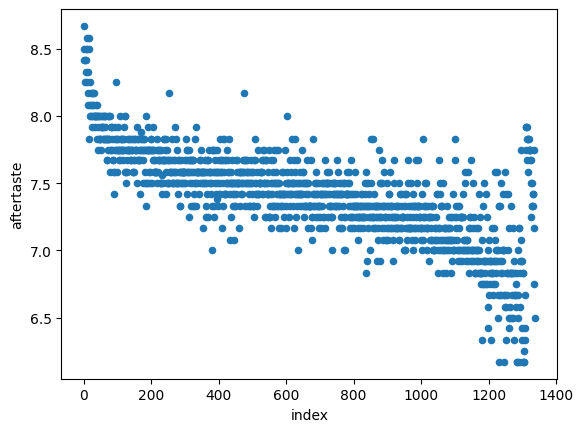

In [32]:
coffee_ratings_with_id = coffee_ratings.reset_index()
coffee_ratings_with_id.plot(x='index', y='aftertaste', kind='scatter')
plt.show()

#### Making systematic sampling safe

To ensure that systematic sampling is safe, we can randomize the row order before sampling.

`.sample()` has an argument `frac` that lets us specify the proportion of the dataset to return in the sample, rather than the absolute number of rows that `n` specifies.

Setting `frac=1` randomly samples the whole dataset, i.e. randomly shuffle the rows. 

Next, the indices need to be reset so that they go in order from zero again. Specifying `drop=True` clears the previous row indexes, and chaining to another `reset_index` call creates a column containing these new indexes. 

**Redrawing the plot with the shuffled dataset shows no pattern between aftertaste and index.**

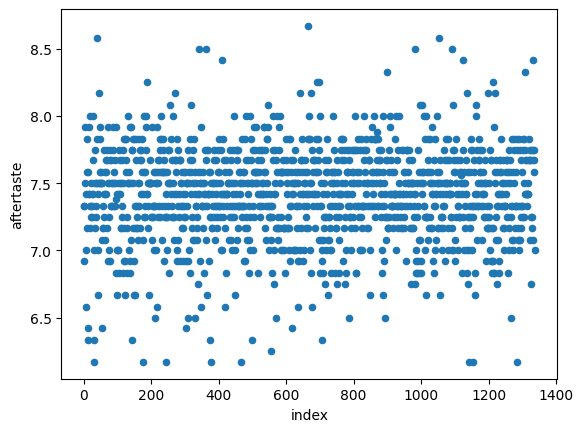

In [33]:
shuffled = coffee_ratings.sample(frac=1)
shuffled = shuffled.reset_index(drop=True).reset_index()
shuffled.plot(x='index', y='aftertaste', kind='scatter')
plt.show()

#### Note that after we shuffle the rows, systematic sampling is essentially the same as simple random sampling. 

### Exercise: Simple random sampling

The simplest method of sampling a population is the one you've seen already. It is known as simple random sampling (sometimes abbreviated to "SRS"), and involves picking rows at random, one at a time, where each row has the same chance of being picked as any other.

In this chapter, you'll apply sampling methods to a synthetic (fictional) employee attrition dataset from IBM, where "attrition" in this context means leaving the company.

In [34]:
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n=70, random_state=18900217)

# Print the sample
print(attrition_samp)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1134   35        0.0      Travel_Rarely        583  Research_Development   
1150   52        0.0         Non-Travel        585                 Sales   
531    33        0.0      Travel_Rarely        931  Research_Development   
395    31        0.0      Travel_Rarely       1332  Research_Development   
392    29        0.0      Travel_Rarely        942  Research_Development   
...   ...        ...                ...        ...                   ...   
361    27        0.0  Travel_Frequently       1410                 Sales   
1180   36        0.0      Travel_Rarely        530                 Sales   
230    26        0.0      Travel_Rarely       1443                 Sales   
211    29        0.0  Travel_Frequently        410  Research_Development   
890    30        0.0  Travel_Frequently       1312  Research_Development   

      DistanceFromHome      Education    EducationField  \
1134                25      

### Exercise: Systematic sampling

One sampling method that avoids randomness is called systematic sampling. Here, you pick rows from the population at regular intervals.

For example, if the population dataset had one thousand rows, and you wanted a sample size of five, you could pick rows 0, 200, 400, 600, and 800.

In [35]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

# Systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]

# Print the sample
print(attrition_sys_samp)

      Age  Attrition BusinessTravel  DailyRate            Department  \
0      21        0.0  Travel_Rarely        391  Research_Development   
21     19        0.0  Travel_Rarely       1181  Research_Development   
42     45        0.0  Travel_Rarely        252  Research_Development   
63     23        0.0  Travel_Rarely        373  Research_Development   
84     30        1.0  Travel_Rarely        945                 Sales   
...   ...        ...            ...        ...                   ...   
1365   48        0.0  Travel_Rarely        715  Research_Development   
1386   48        0.0  Travel_Rarely       1355  Research_Development   
1407   50        0.0  Travel_Rarely        989  Research_Development   
1428   50        0.0     Non-Travel        881  Research_Development   
1449   52        0.0  Travel_Rarely        699  Research_Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                   15        College  Life_Sciences   

### Exercise: Is systematic sampling OK?

Systematic sampling has a problem: if the data has been sorted, or there is some sort of pattern or meaning behind the row order, then the resulting sample may not be representative of the whole population. The problem can be solved by shuffling the rows, but then systematic sampling is equivalent to simple random sampling.

Here you'll look at how to determine whether or not there is a problem.

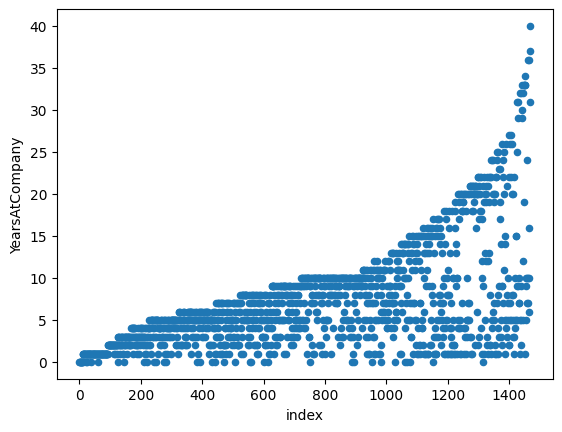

In [36]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x='index', y='YearsAtCompany', kind='scatter')
plt.show()

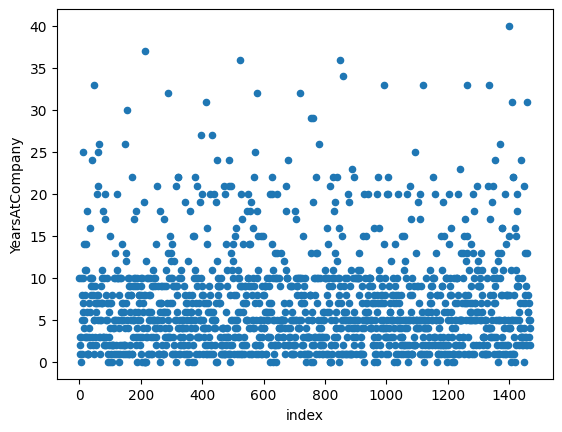

In [37]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x='index', y='YearsAtCompany', kind='scatter')
plt.show()

#### Take-home:

Systematic sampling has problems when the data are sorted or contain a pattern. Shuffling the rows makes it equivalent to simple random sampling.

---
## Stratified and weighted random sampling 

**Stratified sampling** is a technique that allows us to sample a population that contains subgroups. 

#### Coffees by regions

For example, we could group the coffee ratings by country. If we count the number of coffees by country using the `value_counts` method, we can see that these six countries have the most data. (The dataset lists Hawaii and Taiwan as countries for convenience, as they are notable coffee-growing regions.) 

In [38]:
top_counts = coffee_ratings['country_of_origin'].value_counts()
top_counts.head(6)

Mexico                    236
Colombia                  183
Guatemala                 181
Brazil                    132
Taiwan                     75
United States (Hawaii)     73
Name: country_of_origin, dtype: int64

#### Filtering for 6 countries 

To make it easier to think about sampling subgroups, let's limit our analysis to these six countries. We can use the `.isin` method to filter the population and only return the rows corresponding to these six countries. This filtered dataset is stored as `coffee_ratings_top`. 

In [39]:
top_counted_regions = ['Mexico', \
                       'Colombia', \
                       'Guatemala', 
                       'Brazil', \
                       'Taiwan', \
                       'United States (Hawaii)']

top_counted_subset = coffee_ratings['country_of_origin'].isin(top_counted_regions)

coffee_ratings_top = coffee_ratings[top_counted_subset]

#### Counts of a simple random sample

Let's take a ten percent simple random sample of the dataset using `.sample()` with `frac=0.1`. 

We also set the random_state argument to ensure reproducibility. 

As with the whole dataset, we can look at the counts for each country. 

To make comparisons easier, we set normalize to True to convert the counts into a proportion, which shows what proportion of coffees in the sample came from each country. 

In [40]:
coffee_ratings_samp = coffee_ratings_top.sample(frac=0.1, random_state=2021)

coffee_ratings_samp['country_of_origin'].value_counts(normalize=True)

Mexico                    0.250000
Guatemala                 0.204545
Colombia                  0.181818
Brazil                    0.181818
United States (Hawaii)    0.102273
Taiwan                    0.079545
Name: country_of_origin, dtype: float64

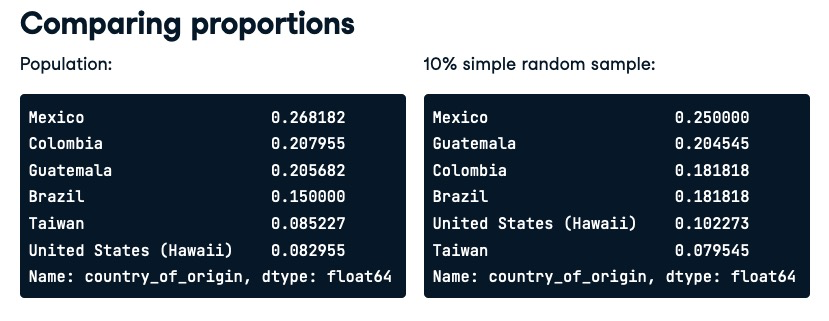

#### Proportional stratified sampling

If we care about the proportions of each country in the sample closely matching those in the population, then we can group the data by country before taking the simple random sample. Note that we used the Python line continuation backslash here, which can be useful for breaking up longer chains of pandas code like this. Calling the dot-sample method after grouping takes a simple random sample within each country. Now the proportions of each country in the stratified sample are much closer to those in the population. 

In [41]:
coffee_ratings_strat = coffee_ratings_top.groupby('country_of_origin')\
    .sample(frac=0.1, random_state=2021)

coffee_ratings_strat['country_of_origin'].value_counts(normalize=True)

Mexico                    0.272727
Colombia                  0.204545
Guatemala                 0.204545
Brazil                    0.147727
Taiwan                    0.090909
United States (Hawaii)    0.079545
Name: country_of_origin, dtype: float64

#### Equal counts stratified sampling 

One variation of stratified sampling is to sample equal counts from each group, rather than an equal proportion. 

The code only has one change from before. This time, we use the `n` argument in `.sample` instead of `frac` to extract fifteen randomly-selected rows from each country. Here, the resulting sample has equal proportions of one-sixth from each country. 

In [42]:
coffee_ratings_eq = coffee_ratings_top.groupby('country_of_origin')\
    .sample(n=15, random_state=2021)

coffee_ratings_eq['country_of_origin'].value_counts(normalize=True)

Brazil                    0.166667
Colombia                  0.166667
Guatemala                 0.166667
Mexico                    0.166667
Taiwan                    0.166667
United States (Hawaii)    0.166667
Name: country_of_origin, dtype: float64

#### Weighted random sampling 

A close relative of stratified sampling that provides even more flexibility is weighted random sampling. 

In this variant, we create a column of weights that adjust the relative probability of sampling each row. 

For example, suppose we thought that it was important to have a higher proportion of Taiwanese coffees in the sample than in the population. 

We create a condition, in this case, rows where the country of origin is Taiwan. Using the where function from NumPy, we can set a weight of two for rows that match the condition and a weight of one for rows that don't match the condition. This means when each row is randomly sampled, Taiwanese coffees have two times the chance of being picked compared to other coffees. When we call dot-sample, we pass the column of weights to the weights argument. 

In [43]:
coffee_ratings_weight = coffee_ratings_top
condition = coffee_ratings_weight['country_of_origin'] == 'Taiwan'

coffee_ratings_weight['weight'] = np.where(condition, 2, 1)

coffee_ratings_weight = coffee_ratings_weight.sample(frac=0.1, weights='weight')

/var/folders/y3/4fs71r3n6sd517ny3ydt1w5w0000gp/T/ipykernel_33474/2473229901.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_ratings_weight['weight'] = np.where(condition, 2, 1)


#### Weighted random sampling results 

Here, we can see that the percentage of Taiwan origin in the sampled dataset doubles that in the population. 

This sort of weighted sampling is common in political polling, where we need to correct for under- or over-representation of demographic groups. 

In [44]:
coffee_ratings_weight['country_of_origin'].value_counts(normalize=True)

Mexico                    0.272727
Colombia                  0.215909
Guatemala                 0.215909
Taiwan                    0.147727
Brazil                    0.090909
United States (Hawaii)    0.056818
Name: country_of_origin, dtype: float64

### Exercise: Proportional stratified sampling

If you are interested in subgroups within the population, then you may need to carefully control the counts of each subgroup within the population. 

**Proportional stratified sampling** results in subgroup sizes within the sample that are representative of the subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup.

In [45]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)

# Print education_counts_pop
print(education_counts_pop)

# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby('Education')\
    .sample(frac=0.4, random_state=2022)

# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize=True)

# Print education_counts_strat
print(education_counts_strat)

Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: Education, dtype: float64
Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: Education, dtype: float64


### Exercise: Equal counts stratified sampling

If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis, then you can use equal counts stratified sampling to generate samples where each subgroup has the same amount of data. 

For example, if you are analyzing blood types, O is the most common blood type worldwide, but you may wish to have equal amounts of O, A, B, and AB in your sample.

In [46]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education')\
    .sample(n=30, random_state=2022)      

# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize=True)

# Print the results
print(education_counts_eq)

Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: Education, dtype: float64


### Exercise: Weighted sampling

Stratified sampling provides rules about the probability of picking rows from your dataset at the subgroup level. 

A generalization of this is weighted sampling, which lets you specify rules about the probability of picking rows at the row level. The probability of picking any given row is proportional to the weight value for that row.

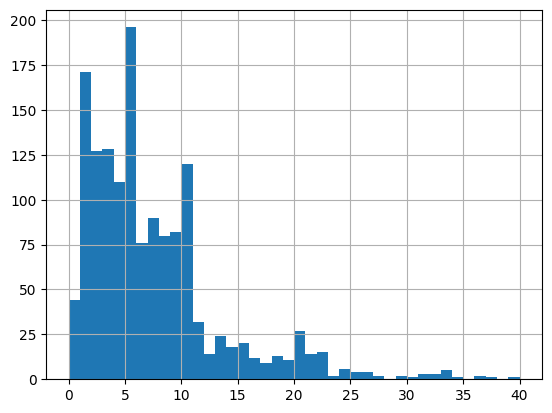

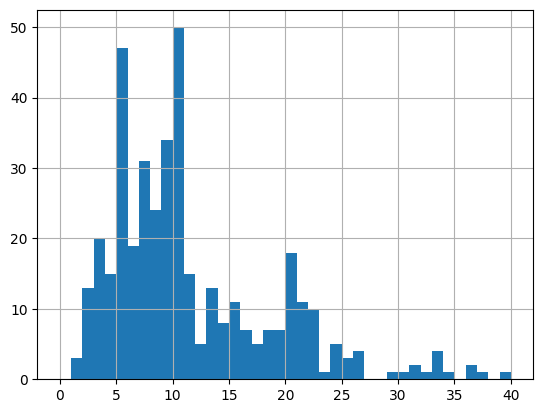

In [47]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

The weighted sample mean is around 11, which is higher than the population mean of around 7. The fact that the two numbers are different means that the weighted simple random sample is biased.

---
## Cluster sampling 

One problem with stratified sampling is that we need to collect data from every subgroup. In cases where collecting data is expensive, for example, when we have to physically travel to a location to collect it, it can make our analysis prohibitively expensive. There's a cheaper alternative called cluster sampling. 

#### Stratified sampling vs. cluster sampling 


**Stratified sampling**

- Split the population into subgroups

- Use simple random sampling on every subgroup 

**Cluster sampling** means that we limit the number of subgroups in the analysis by picking a few of them with simple random sampling. We then perform simple random sampling on each subgroup as before. 

- Use simple random sampling to pick some subgroups

- Use simple random sampling to only those subgroups 

#### Varieties of coffee 

In the coffee dataset, there are 28 varieties. 

To extract unique varieties, we use the dot-unique method. This returns an array, so wrapping it in the list function creates a list of unique varieties. Let's suppose that it's expensive to work with all of the different varieties. 

In [48]:
varieties_pop = list(coffee_ratings['variety'].unique())
varieties_pop

[None,
 'Other',
 'Bourbon',
 'Catimor',
 'Ethiopian Yirgacheffe',
 'Caturra',
 'SL14',
 'Sumatra',
 'SL34',
 'Hawaiian Kona',
 'Yellow Bourbon',
 'SL28',
 'Gesha',
 'Catuai',
 'Pacamara',
 'Typica',
 'Sumatra Lintong',
 'Mundo Novo',
 'Java',
 'Peaberry',
 'Pacas',
 'Mandheling',
 'Ruiru 11',
 'Arusha',
 'Ethiopian Heirlooms',
 'Moka Peaberry',
 'Sulawesi',
 'Blue Mountain',
 'Marigojipe',
 'Pache Comun']

#### Stage 1: sampling for subgroups 

The first stage of cluster sampling is to randomly cut down the number of varieties, and we do this by randomly selecting them. 

Here, we've used the `random.sample` function from the `random` package to get three varieties, specified using the argument k. 

In [49]:
varieties_samp = random.sample(varieties_pop, k=3)
varieties_samp

['Yellow Bourbon', 'Peaberry', 'Sulawesi']

#### Stage 2: sampling each group 

The second stage of cluster sampling is to perform simple random sampling on each of the three varieties we randomly selected. 

We first filter the dataset for rows where the variety is one of the three selected, using the `.isin` method. 

To ensure that the `.isin` filtering removes levels with zero rows, we apply the `cat.remove_unused_categories` method on the Series of focus, which is variety here. If we exclude this method, we might receive an error when sampling by variety level. The pandas code is the same as for stratified sampling. Here, we've opted for equal counts sampling, with five rows from each remaining variety. 

In [50]:
variety_condition = coffee_ratings['variety'].isin(varieties_samp)
coffee_ratings_cluster = coffee_ratings[variety_condition]

coffee_ratings_cluster['variety'] = coffee_ratings_cluster['variety'].astype('category')

coffee_ratings_cluster['variety'] = coffee_ratings_cluster['variety'].cat.remove_unused_categories()

coffee_ratings_cluster.groupby('variety')\
    .sample(n=5, random_state=2021, replace=True)

coffee_ratings_cluster

/var/folders/y3/4fs71r3n6sd517ny3ydt1w5w0000gp/T/ipykernel_33474/669672025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_ratings_cluster['variety'] = coffee_ratings_cluster['variety'].astype('category')
/var/folders/y3/4fs71r3n6sd517ny3ydt1w5w0000gp/T/ipykernel_33474/669672025.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_ratings_cluster['variety'] = coffee_ratings_cluster['variety'].cat.remove_unused_categories()


total_cup_points  species                             owner  \
41               86.17  Arabica          jacques pereira carneiro   
42               86.17  Arabica          jacques pereira carneiro   
147              84.58  Arabica                       daniel magu   
187              84.33  Arabica                          nucoffee   
251              84.00  Arabica                   ipanema coffees   
279              83.83  Arabica                   ipanema coffees   
285              83.83  Arabica                   ipanema coffees   
291              83.83  Arabica          jacques pereira carneiro   
384              83.42  Arabica         bourbon specialty coffees   
394              83.42  Arabica      doi tung development project   
434              83.25  Arabica                          nucoffee   
480              83.08  Arabica                   ipanema coffees   
481              83.08  Arabica                   ipanema coffees   
512              83.00  Arabica          jacques pereira carneiro   
561              82.83  Arabica                   ipanema coffees   
583              82.75  Arabica                    sanjava coffee   
585              82.75  Arabica            lin, che-hao krude 林哲豪   
589              82.75  Arabica                   ipanema coffees   
613              82.67  Arabica                   ipanema coffees   
662              82.50  Arabica                   ipanema coffees   
683              82.42  Arabica                   ipanema coffees   
688              82.42  Arabica                   ipanema coffees   
737              82.25  Arabica                   ipanema coffees   
761              82.17  Arabica                   ipanema coffees   
780              82.08  Arabica                   ipanema coffees   
838              81.83  Arabica                   ipanema coffees   
839              81.83  Arabica                   ipanema coffees   
877              81.67  Arabica                   ipanema coffees   
902              81.58  Arabica                   ipanema coffees   
920              81.50  Arabica          jacques pereira carneiro   
949              81.42  Arabica  kona pacific farmers cooperative   
955              81.33  Arabica          jacques pereira carneiro   
963              81.25  Arabica                   ipanema coffees   
1000             81.00  Arabica         bourbon specialty coffees   
1020             80.92  Arabica          jacques pereira carneiro   
1029             80.92  Arabica      doi tung development project   
1072             80.50  Arabica         bourbon specialty coffees   
1075             80.50  Arabica          jacques pereira carneiro   
1089             80.33  Arabica          cqi taiwan icp cqi台灣合作夥伴   
1164             79.67  Arabica      doi tung development project   
1235             78.00  Arabica            lin, che-hao krude 林哲豪   

           country_of_origin                          farm_name  \
41                    Brazil              pereira estate coffee   
42                    Brazil              pereira estate coffee   
147                    Kenya                              blend   
187                   Brazil                        santa alina   
251                   Brazil                  fazenda rio verde   
279                   Brazil                          rio verde   
285                   Brazil                  fazenda rio verde   
291                   Brazil                  fazenda do sertao   
384                   Brazil            cachoeira da grama farm   
394                 Thailand       doi tung development project   
434                   Brazil                         água limpa   
480                   Brazil                        capoeirinha   
481                   Brazil                          rio verde   
512                   Brazil                        sertao farm   
561                   Brazil                        capoeirinha   
583                Indonesia       

#### <span style='color:red'>Met problem here.</span>

#### Multistage sampling 

Note that we had two stages in the cluster sampling. We randomly sampled the subgroups to include, then we randomly sampled rows from those subgroups. Cluster sampling is a special case of multistage sampling. It's possible to use more than two stages. A common example is national surveys, which can include several levels of administrative regions, like states, counties, cities, and neighborhoods. 

---
### Exercise: Performing cluster sampling

Now that you know when to use cluster sampling, it's time to put it into action. In this exercise, you'll explore the `JobRole` column of the attrition dataset. You can think of each job role as a subgroup of the whole population of employees.

In [51]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby('JobRole').sample(n=10, random_state=2022)


# Print the sample
print(attrition_clust.head())

      Age  Attrition     BusinessTravel  DailyRate            Department  \
812    31        0.0      Travel_Rarely        616  Research_Development   
1190   38        0.0      Travel_Rarely       1495  Research_Development   
378    33        0.0      Travel_Rarely       1069  Research_Development   
920    35        0.0  Travel_Frequently       1199  Research_Development   
917    33        0.0      Travel_Rarely        501  Research_Development   

      DistanceFromHome Education EducationField EnvironmentSatisfaction  \
812                 12  Bachelor        Medical               Very_High   
1190                10  Bachelor        Medical                    High   
378                  1  Bachelor  Life_Sciences                  Medium   
920                 18    Master  Life_Sciences                    High   
917                 15   College        Medical                  Medium   

      Gender  ...  PerformanceRating RelationshipSatisfaction  \
812   Female  ...          

/var/folders/y3/4fs71r3n6sd517ny3ydt1w5w0000gp/T/ipykernel_33474/2940678471.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()


---
## Comparing sampling methods 

#### Review of sampling techniques - setup

For convenience, we'll stick to the six countries with the most coffee varieties that we used before. This corresponds to eight hundred and eighty rows and eight columns, retrieved using the dot-shape attribute. 

In [52]:
top_counted = ['Mexico', 'Colombia', 'Guatemala', 'Brazil', 'Taiwan', 'United States (Hawaii)']

subset_condition = coffee_ratings['country_of_origin'].isin(top_counted)

coffee_ratings_top = coffee_ratings[subset_condition]

coffee_ratings_top.shape

(880, 43)

#### Review of simple random sampling 

Simple random sampling uses `.sample` with either `n` or `frac` set to determine how many rows to pseudo-randomly choose, given a seed value set with random_state. The simple random sample returns two hundred and ninety-three rows because we specified frac as one-third, and one-third of eight hundred and eighty is just over two hundred and ninety-three.

In [53]:
coffee_ratings_srs = coffee_ratings_top.sample(frac=1/3, random_state=2021)

coffee_ratings_srs.shape

(293, 43)

#### Review of stratified sampling 

Stratified sampling groups by the country subgroup before performing simple random sampling on each subgroup. Given each of these top countries have quite a few rows, stratifying produces the same number of rows as the simple random sample. 

In [54]:
coffee_ratings_strat = coffee_ratings_top.groupby('country_of_origin')\
    .sample(frac=1/3, random_state=2021)

coffee_ratings_strat.shape

(293, 43)

#### Review of cluster sampling 

In the cluster sample, we've used two out of six countries to roughly mimic frac equals one-third from the other sample types. Setting n equal to one-sixth of the total number of rows gives roughly equal sample sizes in each of the two subgroups. Using dot-shape again, we see that this cluster sample has close to the same number of rows: two-hundred-ninety-two compared to two-hundred-ninety-three for the other sample types.

<span style='color:red'>ValueError: Cannot take a larger sample than population when 'replace=False'</span>

In [55]:
top_samp = random.sample(top_counted, k=2)
top_condition = coffee_ratings_top['country_of_origin'].isin(top_samp)

coffee_ratings_cluster = coffee_ratings_top[top_condition]

coffee_ratings_cluster['country_of_origin'] = coffee_ratings_cluster['country_of_origin'].astype('category')
coffee_ratings_cluster['country_of_origin'] = coffee_ratings_cluster['country_of_origin']\
    .cat.remove_unused_categories()


coffee_ratings_clust = coffee_ratings_cluster.groupby('country_of_origin')\
    .sample(n=len(coffee_ratings_top) // 6, replace=True)

coffee_ratings_clust.shape

/var/folders/y3/4fs71r3n6sd517ny3ydt1w5w0000gp/T/ipykernel_33474/1578286199.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_ratings_cluster['country_of_origin'] = coffee_ratings_cluster['country_of_origin'].astype('category')
/var/folders/y3/4fs71r3n6sd517ny3ydt1w5w0000gp/T/ipykernel_33474/1578286199.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_ratings_cluster['country_of_origin'] = coffee_ratings_cluster['country_of_origin']\


(292, 43)

#### Calculating mean cup points

Let's calculate a population parameter, the mean of the total cup points. When the population parameter is the mean of a field, it's often called the population mean. Remember that in real-life scenarios, we typically wouldn't know what the population mean is. Since we have it here, though, we can use this value of eighty-one-point-nine as a gold standard to measure against. Now we'll calculate the same value using each of the sampling techniques we've discussed. These are point estimates of the mean, often called sample means. The simple and stratified sample means are really close to the population mean. Cluster sampling isn't quite as close, but that's typical. Cluster sampling is designed to give us an answer that's almost as good while using less data. 

In [56]:
coffee_ratings_top['total_cup_points'].mean()

81.94700000000002

In [57]:
coffee_ratings_srs['total_cup_points'].mean()

81.91331058020478

In [58]:
coffee_ratings_strat['total_cup_points'].mean()

81.92566552901025

In [59]:
coffee_ratings_clust['total_cup_points'].mean()

82.43647260273973

In [60]:
coffee_ratings_top.groupby('country_of_origin')\
    ['total_cup_points'].mean()

country_of_origin
Brazil                    82.405909
Colombia                  83.106557
Guatemala                 81.846575
Mexico                    80.890085
Taiwan                    82.001333
United States (Hawaii)    81.820411
Name: total_cup_points, dtype: float64

#### Mean cup points by country: simple random 

Here's a slightly more complicated calculation of the mean total cup points for each country. We group by country before calculating the mean to return six numbers. So how do the numbers from the simple random sample compare? The sample means are pretty close to the population means. 

In [61]:
coffee_ratings_srs.groupby('country_of_origin')\
    ['total_cup_points'].mean()

country_of_origin
Brazil                    82.251875
Colombia                  82.961014
Guatemala                 81.392917
Mexico                    81.152000
Taiwan                    81.957391
United States (Hawaii)    81.766400
Name: total_cup_points, dtype: float64

#### Mean cup points by country: stratified

The same is true of the sample means from the stratified technique. Each sample mean is relatively close to the population mean. 

In [62]:
coffee_ratings_strat.groupby('country_of_origin')\
    ['total_cup_points'].mean()

country_of_origin
Brazil                    82.499773
Colombia                  83.288197
Guatemala                 81.727667
Mexico                    80.994684
Taiwan                    81.846800
United States (Hawaii)    81.051667
Name: total_cup_points, dtype: float64

#### Mean cup points by country: cluster

With cluster sampling, while the sample means are pretty close to the population means, the obvious limitation is that we only get values for the two countries that were included in the sample. If the mean cup points for each country is an important metric in our analysis, cluster sampling would be a bad idea. 

In [63]:
coffee_ratings_clust.groupby('country_of_origin')\
    ['total_cup_points'].mean()

country_of_origin
Colombia     83.183425
Guatemala    81.689521
Name: total_cup_points, dtype: float64

### Exercise: 3 kinds of sampling

You're going to compare the performance of point estimates using simple, stratified, and cluster sampling. Before doing that, you'll have to set up the samples.

You'll use the `RelationshipSatisfaction` column of the `attrition_pop` dataset, which categorizes the employee's relationship with the company. It has four levels: `Low`, `Medium`, `High`, and `Very_High`.

In [64]:
# Perform simple random sampling to get 0.25 of the population
attrition_srs = attrition_pop.sample(frac=1/4, random_state=2022)

# Perform stratified sampling to get 0.25 of each relationship group
attrition_strat = attrition_pop.groupby('RelationshipSatisfaction').sample(frac=1/4, random_state=2022)

# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition_pop['RelationshipSatisfaction'].unique())

# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique, k=2)

# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop['RelationshipSatisfaction'].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop[satis_condition]
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()

# Perform cluster sampling on the selected group, getting 0.25 of attrition_pop
attrition_clust = attrition_clust_prep.groupby('RelationshipSatisfaction').sample(n=len(attrition_pop) //4, random_state=2022, replace=True)

/var/folders/y3/4fs71r3n6sd517ny3ydt1w5w0000gp/T/ipykernel_33474/117213016.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()


---
# 3. Sampling Distributions

Let’s test your sampling. In this chapter, you’ll discover how to quantify the accuracy of sample statistics using relative errors, and measure variation in your estimates by generating sampling distributions. 

## Relative error of point estimates 

Let's see how the size of the sample affects the accuracy of the point estimates we calculate. 

#### Sample size is number of rows

In [65]:
len(coffee_ratings.sample(n=300))

300

In [66]:
len(coffee_ratings.sample(frac=0.25))

334

#### Various sample sizes

Larger sample sizes give us more accurate results. 

In [67]:
coffee_ratings['total_cup_points'].mean()

82.15120328849028

In [68]:
coffee_ratings.sample(n=10)['total_cup_points'].mean()

82.424

In [69]:
coffee_ratings.sample(n=100)['total_cup_points'].mean()

82.425

In [70]:
coffee_ratings.sample(n=1000)['total_cup_points'].mean()

82.19787000000001

#### Relative errors 

The most common metric for assessing the difference between the population and a sample mean is the relative error. The relative error is the absolute difference between the two numbers; that is, we ignore any minus signs, divided by the population mean. Here, we also multiply by one hundred to make it a percentage. 

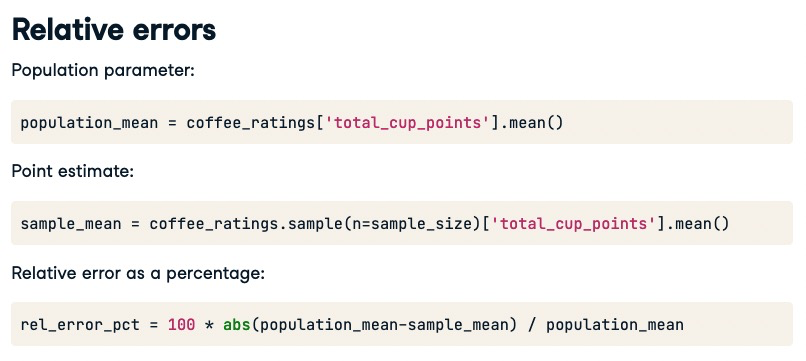

#### Relative error vs. sample size

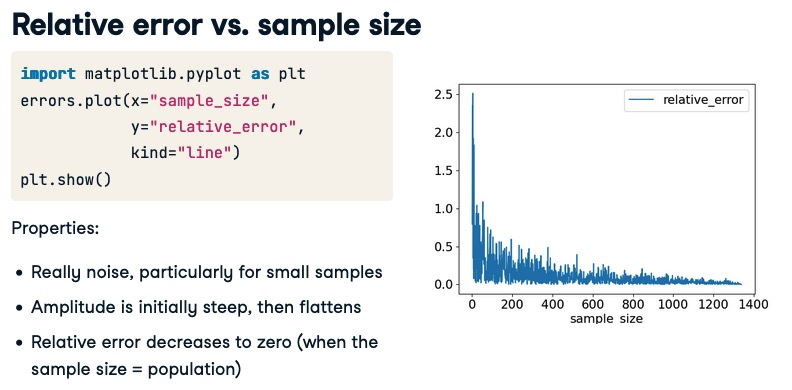

## Creating a sampling distribution 

#### Same code, 1000 times

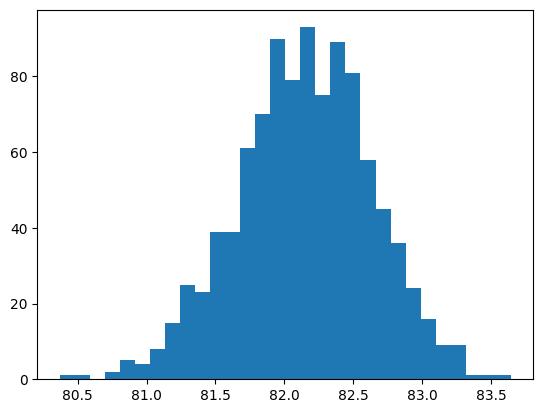

In [71]:
mean_cup_points_1000 = []

for i in range(1000):
    mean_cup_points_1000.append(
        coffee_ratings.sample(n=30)['total_cup_points'].mean()
    )
    
plt.hist(mean_cup_points_1000, bins=30)
plt.show()

#### Jargon: sampling distribution

A sampling distribution is a distribution of replicates of point estimates. 

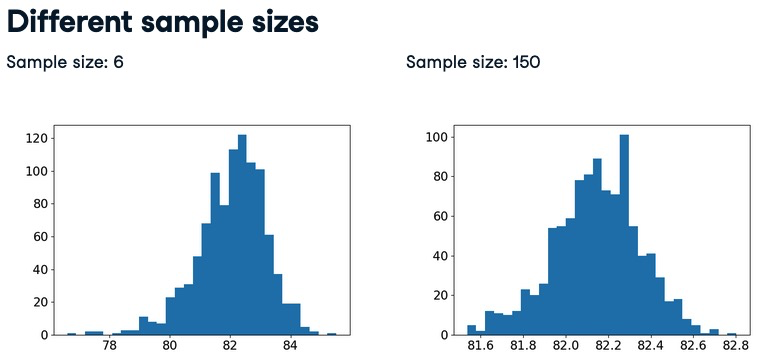

## Approximate sampling distributions

#### 4 dice

Let's consider the case of four six-sided dice rolls. We can generate all possible combinations of rolls using the expand_grid function, which is defined in the pandas documentation, and uses the itertools package. There are six to the power four, or one-thousand-two-hundred-ninety-six possible dice roll combinations. 

Followed [this thread](https://cloud.tencent.com/developer/ask/sof/32119)

See also [Pandas documentation](https://pandas.pydata.org/pandas-docs/version/0.17.1/cookbook.html#creating-example-data)

In [72]:
from itertools import product
def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())],
                       columns=dictionary.keys())

In [73]:
dice = expand_grid(
    {'die1': [1, 2, 3, 4, 5, 6],
     'die2': [1, 2, 3, 4, 5, 6],
     'die3': [1, 2, 3, 4, 5, 6],
     'die4': [1, 2, 3, 4, 5, 6]
    }
)

print(dice)

      die1  die2  die3  die4
0        1     1     1     1
1        1     1     1     2
2        1     1     1     3
3        1     1     1     4
4        1     1     1     5
...    ...   ...   ...   ...
1291     6     6     6     2
1292     6     6     6     3
1293     6     6     6     4
1294     6     6     6     5
1295     6     6     6     6

[1296 rows x 4 columns]


#### Mean roll

In [74]:
dice['mean_roll'] = (dice['die1'] +
                     dice['die2'] +
                     dice['die3'] +
                     dice['die4']) / 4

print(dice)

      die1  die2  die3  die4  mean_roll
0        1     1     1     1       1.00
1        1     1     1     2       1.25
2        1     1     1     3       1.50
3        1     1     1     4       1.75
4        1     1     1     5       2.00
...    ...   ...   ...   ...        ...
1291     6     6     6     2       5.00
1292     6     6     6     3       5.25
1293     6     6     6     4       5.50
1294     6     6     6     5       5.75
1295     6     6     6     6       6.00

[1296 rows x 5 columns]


#### Exact sampling distribution 

Since the mean roll takes discrete values instead of continuous values, the best way to see the distribution of mean_roll is to draw a bar plot.

First, we convert mean_roll to a categorical by setting its type to category. We are interested in the counts of each value, so we use dot-value_counts, passing the sort equals False argument. This ensures the x-axis ranges from one to six instead of sorting the bars by frequency. Chaining dot-plot to value_counts, and setting kind to "bar", produces a bar plot of the mean roll distribution. This is the exact sampling distribution of the mean roll because it contains every single combination of die rolls. 

<Axes: >

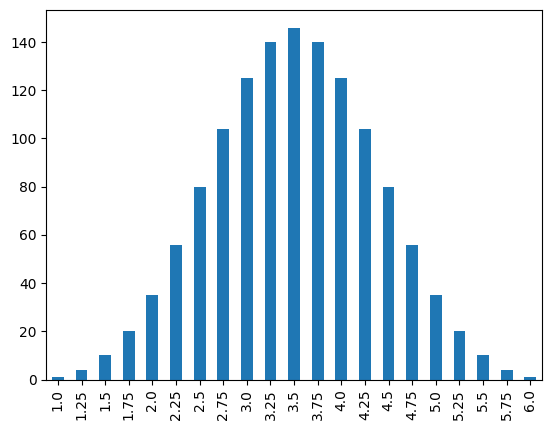

In [75]:
dice['mean_roll'] = dice['mean_roll'].astype('category')
dice['mean_roll'].value_counts(sort=False).plot(kind='bar')

#### The number of outcomes increases fast 

If we increase the number of dice in our scenario, the number of possible outcomes increases by a factor of six each time. These values can be shown by creating a DataFrame with two columns: n_dice, ranging from 1 to 100, and n_outcomes, which is the number of possible outcomes, calculated using six to the power of the number of dice. With just one hundred dice, the number of outcomes is about the same as the number of atoms in the universe: six-point-five times ten to the seventy-seventh power. 

**Long before you start dealing with big datasets, it becomes computationally impossible to calculate the exact sampling distribution. That means we need to rely on approximations.** 

In [76]:
n_dice = list(range(1, 101))
n_outcomes = []

for n in n_dice:
    n_outcomes.append(6**n)
    
outcomes = pd.DataFrame(
    {'n_dice': n_dice,
     'n_outcomes': n_outcomes})

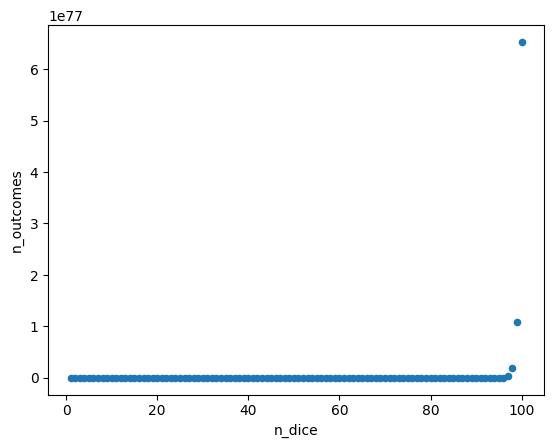

In [77]:
outcomes.plot(x='n_dice',
              y='n_outcomes',
              kind='scatter')

plt.show()

#### Simulating the mean of four dice rolls

We can generate a sample mean of four dice rolls using NumPy's random-dot-choice method, specifying size as four. This will randomly choose values from a specified list, in this case, four values from the numbers one to six, which is created using a range from one to seven wrapped in the list function. Notice that we set replace equals True because we can roll the same number several times. 

Then we use a for loop to generate lots of sample means, in this case, one thousand. We again use the dot-append method to populate the sample means list with our simulated sample means. The output contains a sampling of many of the same values we saw with the exact sampling distribution. 

In [78]:
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
    np.random.choice(list(range(1,7)), size=4, replace=True).mean()
    )

#### Approximate sampling distribution

Here's a histogram of the approximate sampling distribution of mean rolls. This time, it uses the simulated rather than the exact values. It's known as an approximate sampling distribution. Notice that although it isn't perfect, it's pretty close to the exact sampling distribution. Usually, we don't have access to the whole population, so we can't calculate the exact sampling distribution. However, we can feel relatively confident that using an approximation will provide a good guess as to how the sampling distribution will behave. 

(array([  1.,   2.,   9.,  12.,  27.,  56.,  55.,  69.,  89., 103., 115.,
        123.,  86.,  96.,  66.,  33.,  29.,  14.,   8.,   7.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
        3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75, 6.  ]),
 <BarContainer object of 20 artists>)

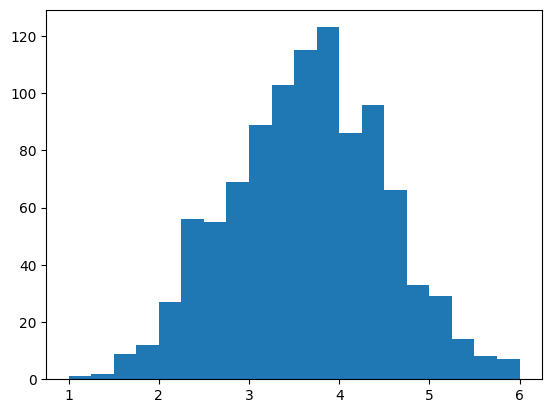

In [79]:
plt.hist(sample_means_1000, bins=20)

### Exercise 

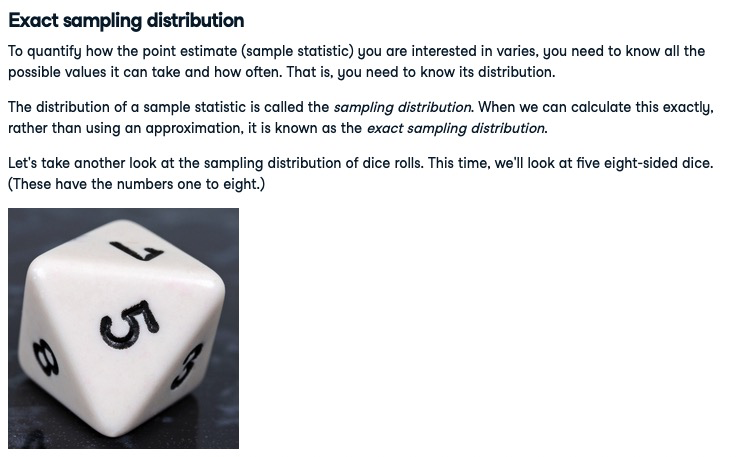

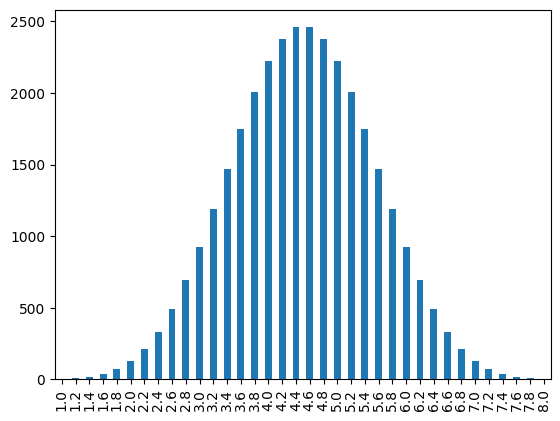

In [80]:
# Expand a grid representing 5 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })

# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] + 
                     dice['die3'] + dice['die4'] + 
                     dice['die5']) / 5
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort=False).plot(kind='bar')
plt.show()

### Exercise: Generating an approximate sampling distribution

Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of possible rolls is `8**5`, which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.

In this situation, you can calculate an `approximate sampling distribution` by simulating the exact sampling distribution. That is, you can repeat a procedure over and over again to simulate both the sampling process and the sample statistic calculation process.

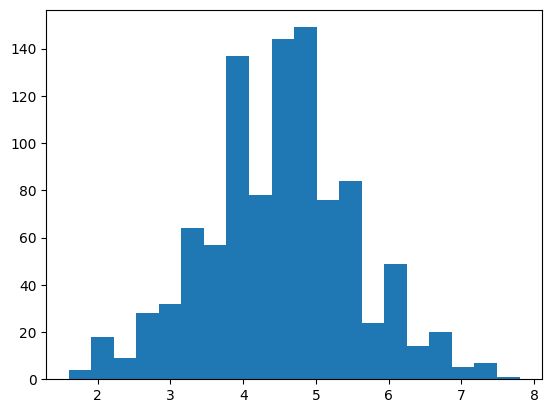

In [81]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )

# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000, bins=20)
plt.show()

#### Take home:
The exact sampling distribution can only be calculated if you know what the population is and if the problems are small and simple enough to compute. Otherwise, the approximate sampling distribution must be used.

## Standard errors and the Central Limit Theorem

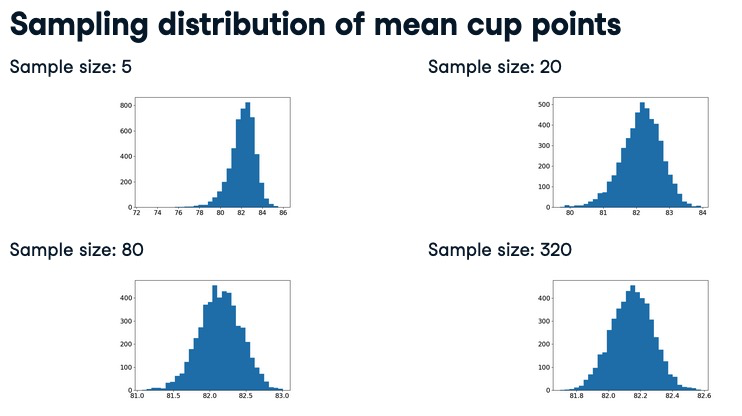

#### Consequences of the central limit theorem

- The means of independent samples have normal distributions. 

- Then, as the sample size increases, we see two things. 

    - The distribution of these averages gets closer to being normal,and 
    
    - The width of this sampling distribution gets narrower. 

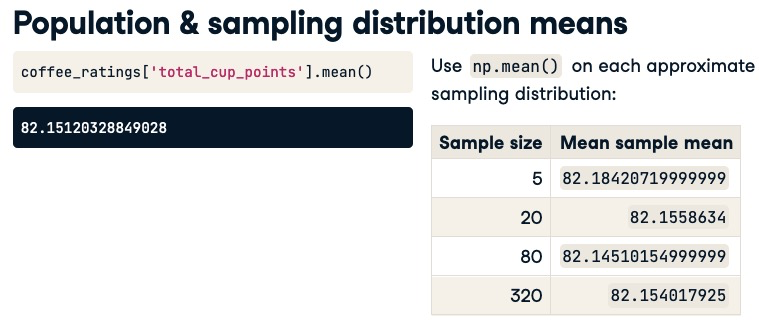


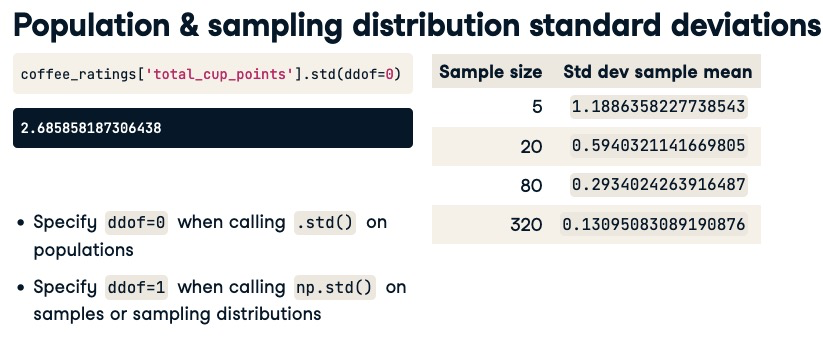

#### Population mean over square root sample size 

One other consequence of the central limit theorem is that if we divide the population standard deviation, in this case around 2-point-7, by the square root of the sample size, we get an estimate of the standard deviation of the sampling distribution for that sample size. It isn't exact because of the randomness involved in the sampling process, but it's pretty close. 

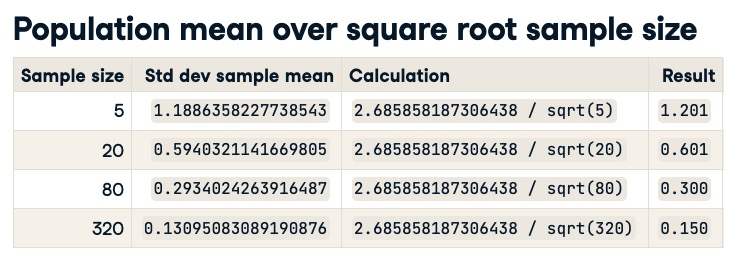

#### Standard error 

- Standard deviation of the sampling distribution 

- It is useful in a variety of contexts, from estimating population standard deviation to setting expectations on what level of variability we would expect from the sampling process. 

---
# 4. Bootstrap Distributions

You’ll get to grips with resampling to perform bootstrapping and estimate variation in an unknown population. You’ll learn the difference between sampling distributions and bootstrap distributions using resampling. 

## Introduction to bootstrapping 

#### Why sample with replacement?

So far, we've been treating the coffee_ratings dataset as the population of all coffees. Of course, it doesn't include every coffee in the world, so we could treat the coffee dataset as just being a big sample of coffees. 

To imagine what the whole population is like, we need to approximate the other coffees that aren't in the dataset. Each of the coffees in the sample dataset will have properties that are representative of the coffees that we don't have. 

Resampling lets us use the existing coffees to approximate those other theoretical coffees. 

#### Coffee data preparation

To keep it simple, let's focus on three columns of the coffee dataset. To make it easier to see which rows ended up in the sample, we'll add a row index column called index using the reset_index method. 

In [82]:
coffee_focus = coffee_ratings[['variety', 'country_of_origin', 'flavor']]
coffee_focus = coffee_focus.reset_index()
coffee_focus

index  variety country_of_origin  flavor
0         0     None          Ethiopia    8.83
1         1    Other          Ethiopia    8.67
2         2  Bourbon         Guatemala    8.50
3         3     None          Ethiopia    8.58
4         4    Other          Ethiopia    8.50
...     ...      ...               ...     ...
1333   1333     None           Ecuador    7.58
1334   1334     None           Ecuador    7.67
1335   1335     None     United States    7.33
1336   1336     None             India    6.83
1337   1337     None           Vietnam    6.67

[1338 rows x 4 columns]

#### Resampling with `.sample()`

To sample with replacement, we call sample as usual but set the replace argument to True. 

`Setting frac to 1 produces a sample of the same size as the original dataset.` 

In [83]:
coffee_resamp = coffee_focus.sample(frac=1, replace=True)
coffee_resamp

index  variety       country_of_origin  flavor
502     502  Caturra                 Vietnam    7.67
598     598  Caturra                Colombia    7.33
1304   1304   Catuai                Honduras    6.17
451     451  Bourbon               Guatemala    7.67
421     421     None                  Brazil    7.67
...     ...      ...                     ...     ...
307     307  Caturra                Colombia    7.67
676     676  Bourbon               Guatemala    7.58
1113   1113     None  United States (Hawaii)    7.50
628     628     None                Colombia    7.58
1140   1140  Bourbon               Guatemala    7.25

[1338 rows x 4 columns]

#### Repeated coffees

In [84]:
coffee_resamp['index'].value_counts()

427     7
335     6
593     6
996     6
1188    5
       ..
27      1
1101    1
952     1
711     1
1113    1
Name: index, Length: 845, dtype: int64

#### Missing coffees


In [85]:
num_unique_coffees = len(coffee_resamp.drop_duplicates(subset='index'))
num_unique_coffees

845

In [86]:
len(coffee_ratings) - num_unique_coffees

493

#### Bootstrapping 

We're going to use resampling for a technique called bootstrapping. In some sense, bootstrapping is the opposite of sampling from a population. With sampling, we treat the dataset as the population and move to a smaller sample. With bootstrapping, we treat the dataset as a sample and use it to build up a theoretical population. A use case of bootstrapping is to try to understand the variability due to sampling. This is important in cases where we aren't able to sample the population multiple times to create a sampling distribution. 

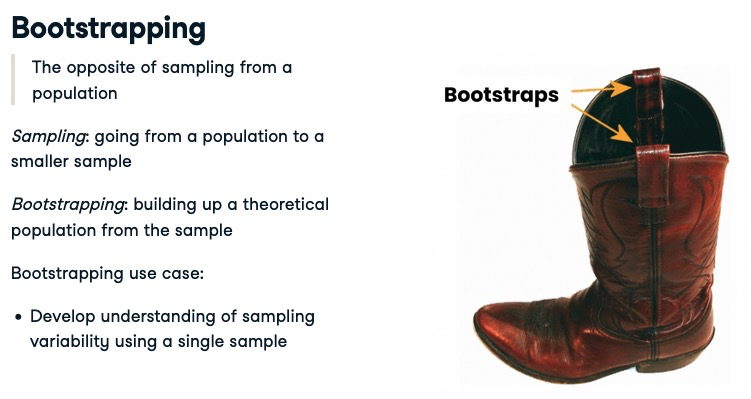

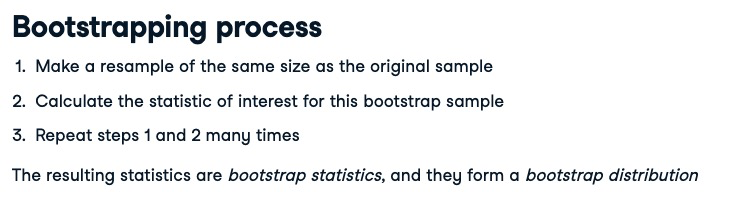

#### Bootstrapping coffee mean flavor

In [87]:
mean_flavors_1000 = []

for i in range(1000):
    mean_flavors_1000.append(
        np.mean(coffee_sample.sample(frac=1, replace=True)['flavor'])
    )

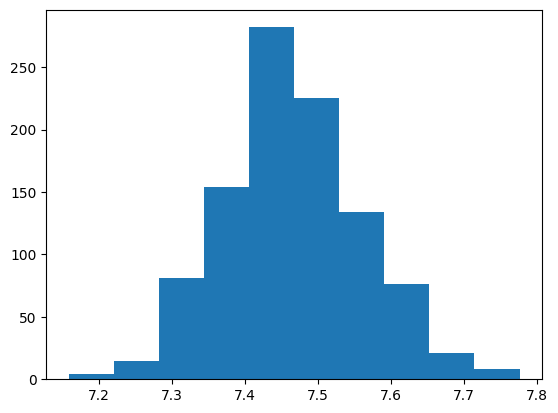

In [88]:
plt.hist(mean_flavors_1000)
plt.show()

## Comparing sampling and bootstrap distributions 

#### 500 sample from the coffee focus subset

In [89]:
coffee_sample = coffee_ratings[['variety', 'country_of_origin', 'flavor']]\
    .reset_index().sample(n=500)

#### The bootstrap of mean coffee flavors

In [90]:
mean_flavors_5000 = []

for i in range(5000):
    mean_flavors_5000.append(
        np.mean(coffee_sample.sample(frac=1, replace=True)['flavor'])
    )

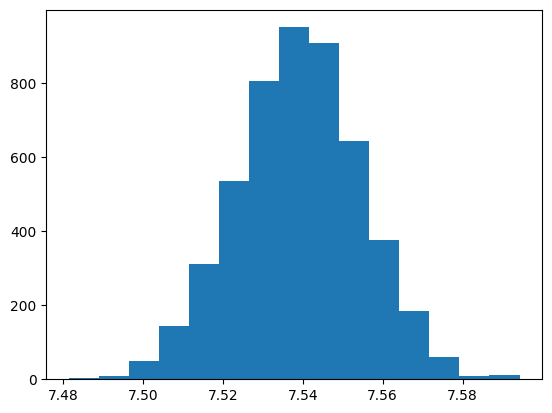

In [91]:
bootstrap_distn = mean_flavors_5000
plt.hist(bootstrap_distn, bins=15)
plt.show()

#### Sample, bootstrap distribution, population means

sample mean:

In [92]:
coffee_sample['flavor'].mean()

7.5391

Estimated population mean:

In [93]:
np.mean(bootstrap_distn)

7.539016899999999

True population mean:

In [94]:
coffee_ratings['flavor'].mean()

7.526046337817639

#### Interpreting the means

The bootstrap distribution mean is usually almost identical to the original sample mean. However, that is not often a good thing. 

If the original sample wasn't closely representative of the population, then the bootstrap distribution mean won't be a good estimate of the population mean. 

**Bootstrapping cannot correct any potential biases due to differences between the sample and the population.** 

#### Sample sd vs. bootstrap distribution sd

While we do have that limitation in estimating the population mean, one great thing about distributions is that we can also quantify variation. The standard deviation of the sample flavors is around zero-point-three-five-four. Recall that pandas dot-std calculates a sample standard deviation by default. If we calculate the standard deviation of the bootstrap distribution, specifying a ddof of one, then we get a completely different number. So what's going on here? 

Sample standard deviation:

In [95]:
coffee_sample['flavor'].std()

0.3408820781184679

Estimated population standard deviation:

In [96]:
np.std(bootstrap_distn, ddof=1)

0.015607398963648045

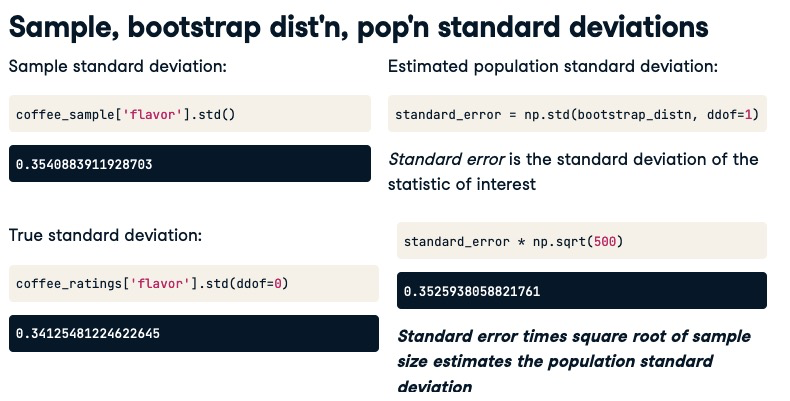

#### Interpreting the standard errors 

To recap, the estimated standard error is the standard deviation of the bootstrap distribution values for our statistic of interest. This estimated standard error times the square root of the sample size gives a really good estimate of the standard deviation of the population. That is, although bootstrapping was poor at estimating the population mean, it is generally great for estimating the population standard deviation. 

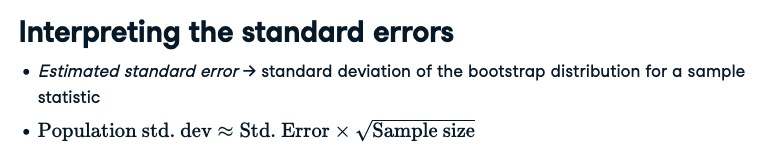

#### Take home:

The sampling distribution mean can be used to estimate the population mean, but that is not the case with the bootstrap distribution.

When you don't have all the values from the population or the ability to sample multiple times, you can use bootstrapping to get a good estimate of the population standard deviation.

## Confidence intervals

#### Confidence intervals 

One way to quantify these distributions is the idea of "values within one standard deviation of the mean", which gives a good sense of where most of the values in a distribution lie. In this final lesson, we'll formalize the idea of values close to a statistic by defining the term "confidence interval". 

#### Predicting the weather 

Consider meteorologists predicting weather in one of the world's most unpredictable regions - the northern Great Plains of the US and Canada. Rapid City, South Dakota was ranked as the least predictable of the 120 US cities with a National Weather Service forecast office. Suppose we've taken a job as a meteorologist at a news station in Rapid City. Our job is to predict tomorrow's high temperature. 

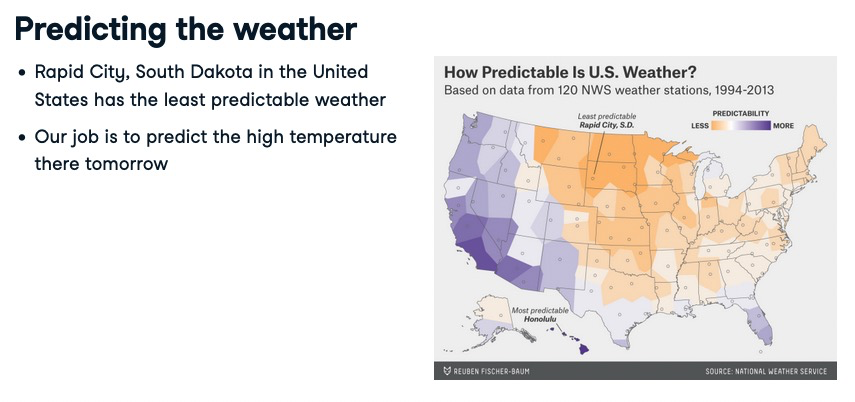

#### Quantile method for confidence intervals 

If we want to include ninety-five percent of the values in the confidence interval, we can use quantiles. Recall that quantiles split distributions into sections containing a particular proportion of the total data. To get the middle ninety-five percent of values, we go from the point-zero-two-five quantile to the point-nine-seven-five quantile since the difference between those two numbers is point-nine-five. To calculate the lower and upper bounds for this confidence interval, we call quantile from NumPy, passing the distribution values and the quantile values to use. The confidence interval is from around seven-point-four-eight to seven-point-five-four. 

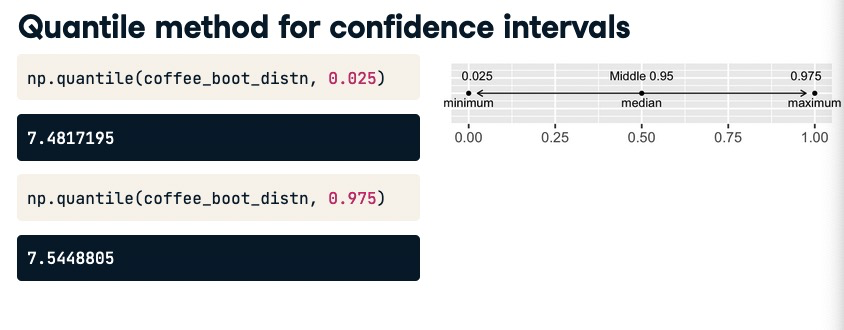

#### Inverse cumulative distribution function 

There is a second method to calculate confidence intervals. To understand it, we need to be familiar with the normal distribution's inverse cumulative distribution function. The bell curve we've seen before is the probability density function or PDF. Using calculus, if we integrate this, we get the cumulative distribution function or CDF. If we flip the x and y axes, we get the inverse CDF. We can use scipy-dot-stats and call norm-dot-ppf to get the inverse CDF. It takes a quantile between zero and one and returns the values of the normal distribution for that quantile. The parameters of loc and scale are set to 0 and 1 by default, corresponding to the standard normal distribution. Notice that the values corresponding to point-zero-two-five and point-nine-seven-five are about minus and plus two for the standard normal distribution. 

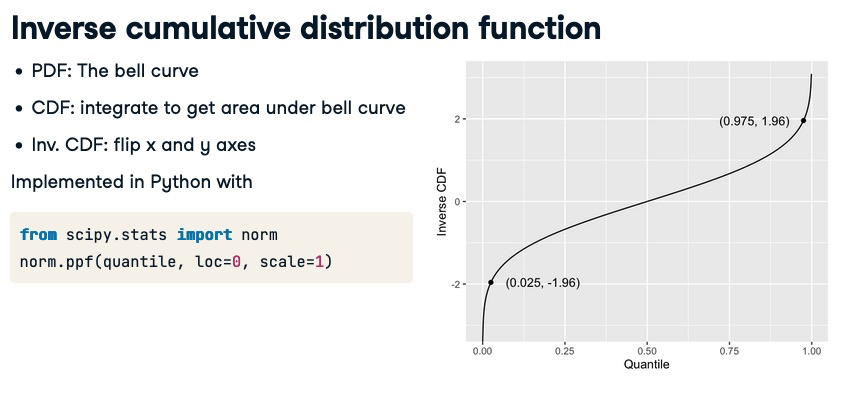

#### Standard error method for confidence interval 

This second method for calculating a confidence interval is called the standard error method. First, we calculate the point estimate, which is the mean of the bootstrap distribution, and the standard error, which is estimated by the standard deviation of the bootstrap distribution. Then we call norm-dot-ppf to get the inverse CDF of the normal distribution with the same mean and standard deviation as the bootstrap distribution. Again, the confidence interval is from seven-point-four-eight to seven-point-five-four, though the numbers differ slightly from last time since our bootstrap distribution isn't perfectly normal. 

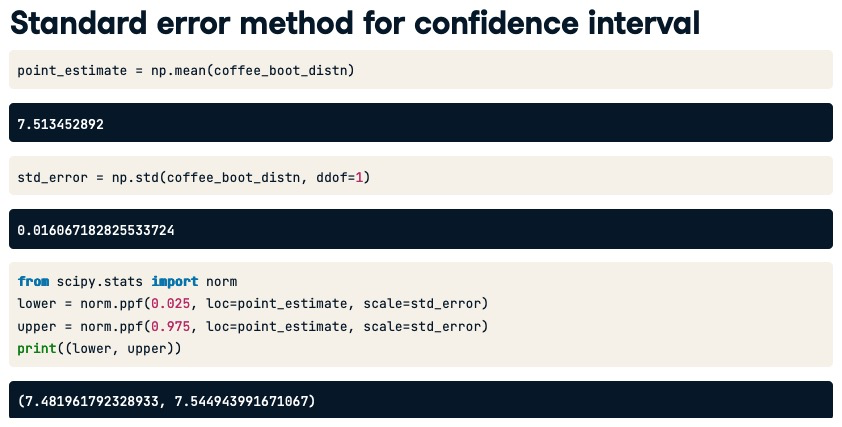

### Exercise

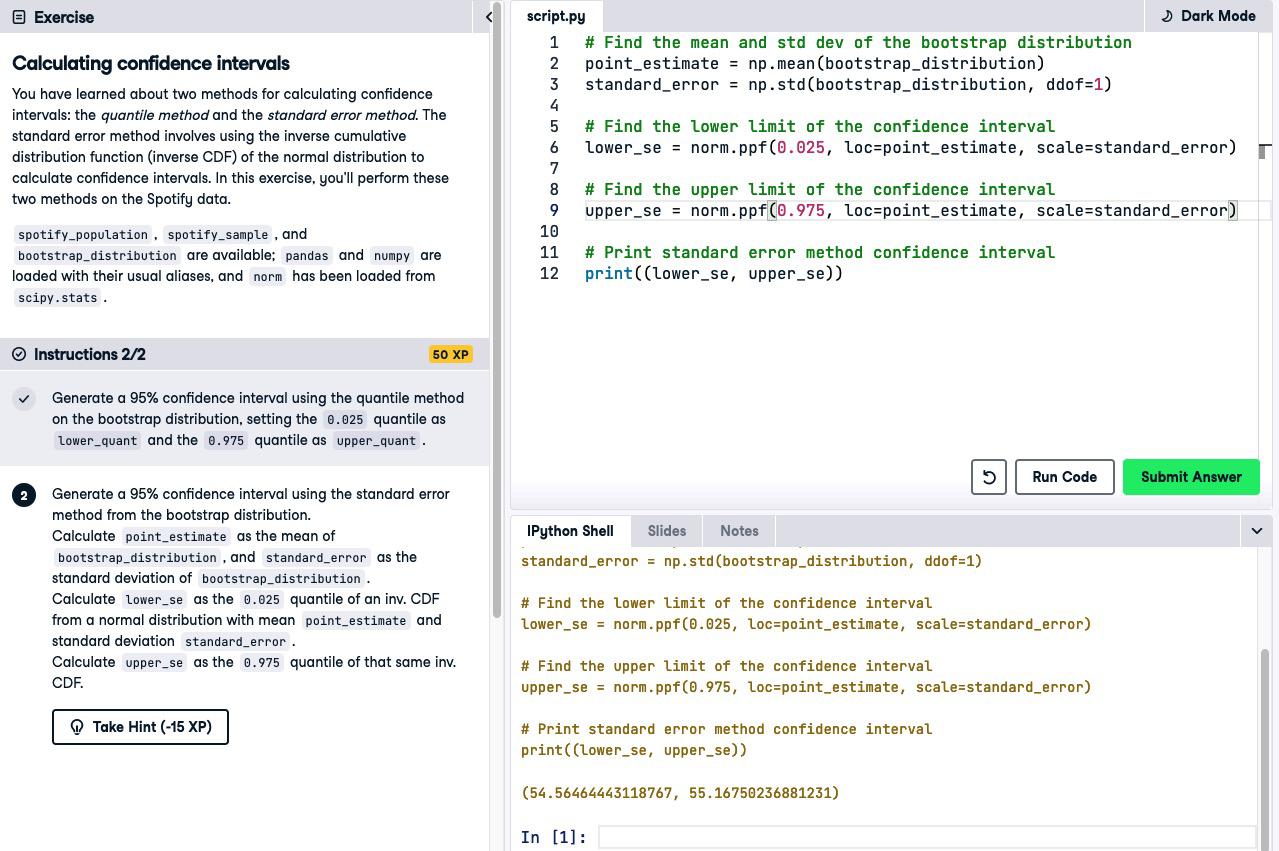

# Recap

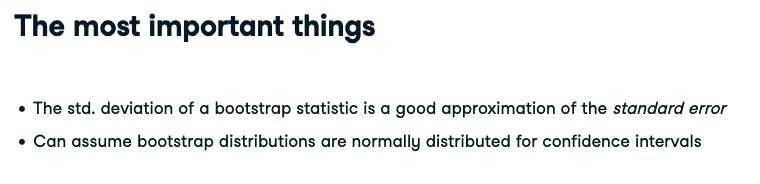

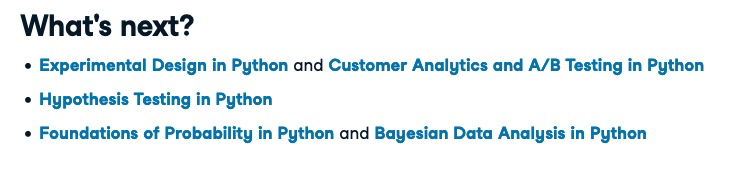